# Avance 1 proyecto integrador: EDA

Se inicia el pipeline analitico de los datos con la base de datos proporcionada por la empresa. Se realizara un analisis previo de la calidad, estructura e integridad de los datos como se vera a continuacion

## Carga de datos desde la base de datos del cliente

In [10]:
#Importar librerias a utilizar 

import pandas as pd 
import numpy as np

Leer la base de datos de clientes en USA:

In [11]:
df_restaurants_USA = pd.read_csv('base_datos_restaurantes_USA_v2.csv')

## Limpieza de los datos

### Identificando valores nulos, duplicados y errores

In [12]:
df_restaurants_USA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_persona                 30000 non-null  int64  
 1   nombre                     30000 non-null  object 
 2   apellido                   30000 non-null  object 
 3   edad                       29899 non-null  float64
 4   genero                     30000 non-null  object 
 5   ciudad_residencia          30000 non-null  object 
 6   estrato_socioeconomico     30000 non-null  object 
 7   frecuencia_visita          30000 non-null  int64  
 8   promedio_gasto_comida      29855 non-null  float64
 9   ocio                       30000 non-null  object 
 10  consume_licor              30000 non-null  object 
 11  preferencias_alimenticias  28597 non-null  object 
 12  membresia_premium          30000 non-null  object 
 13  telefono_contacto          14834 non-null  obj

Como podemos observar, edad promedio_gasto_comida, preferencias_alimenticias, telefono_contacto y correo_electronico tienen valores vacios. Veamos cuantos de ellos son vacios:

In [13]:
porcentaje_vacios = df_restaurants_USA.isna().mean() * 100
print(porcentaje_vacios)

id_persona                    0.000000
nombre                        0.000000
apellido                      0.000000
edad                          0.336667
genero                        0.000000
ciudad_residencia             0.000000
estrato_socioeconomico        0.000000
frecuencia_visita             0.000000
promedio_gasto_comida         0.483333
ocio                          0.000000
consume_licor                 0.000000
preferencias_alimenticias     4.676667
membresia_premium             0.000000
telefono_contacto            50.553333
correo_electronico           50.240000
tipo_de_pago_mas_usado        0.000000
ingresos_mensuales            0.000000
dtype: float64


Se decide eliminar las columnas: telefono_contacto y correo_electronico. Primero porque tienen mas del 50% de campos vacios y segundo porque no son realmente relevantes para este analisis, sino que servirian mas adelante en una campaña de mercadeo para enviar informacion a los clientes basado en los insights que generemos de este proyecto.

In [14]:
df_restaurants_USA.drop(columns=['telefono_contacto', 'correo_electronico'], inplace=True)

Con respecto a edad, promedio_gastos_comida y preferencias_alimenticias, la mejor opcion es inputar los datos faltantes ya que solo un pequeño porcentaje aparece vacio (menos del 5%). 

Ahora bien, para saber con que valor representativo se reemplazara cada uno, se analiza primero los datos estadisticos de estas tres columnas:

#### Tratamiento de edad

In [73]:
# Primero convertimos la edad a enteros:
df_restaurants_USA['edad'] = df_restaurants_USA['edad'].astype('Int64')

In [74]:
# Luego analizamos los datos estadisticos de la columna edad
print(df_restaurants_USA['edad'].describe())

count      29692.0
mean     48.916173
std      18.160132
min           18.0
25%           33.0
50%           49.0
75%           65.0
max           80.0
Name: edad, dtype: Float64


Vemos a primera vista que el valor maximo: 300 y minimo -5 estan erroneos. Vamos a comprobar la distribucion con un histograma:

<Axes: >

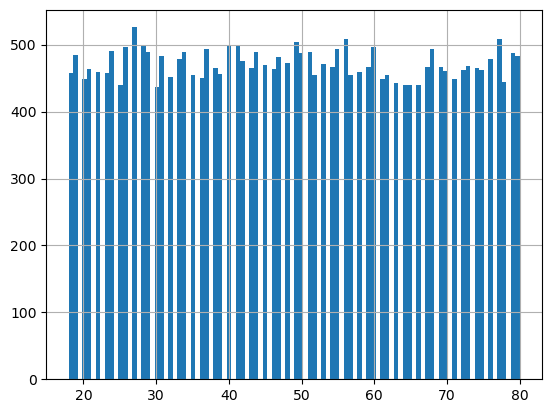

In [75]:
df_restaurants_USA['edad'].hist(bins=100)

Como se puede observar, es obvio que valores negativos y valores alrededor de 300 son ilogicos (Outliers) probablemente errores en la digitacion, por lo que vamos a volverlos NaN (En vez de eliminar toda la fila y perder datos importantes de otras columnas) y a inputarlos mas adelante con un valor representativo:

In [76]:
df_restaurants_USA['edad']=df_restaurants_USA['edad'].where((df_restaurants_USA['edad']>5) & (df_restaurants_USA['edad']<110), np.nan)

In [77]:
# Analizamos nuevamente los datos estadisticos de la columna edad
print(df_restaurants_USA['edad'].describe())

# Obtenemos el coeficiente  de variacion de la columna edad
print("Coeficiente de variacion: ",df_restaurants_USA['edad'].std()*100/df_restaurants_USA['edad'].mean())

count      29692.0
mean     48.916173
std      18.160132
min           18.0
25%           33.0
50%           49.0
75%           65.0
max           80.0
Name: edad, dtype: Float64
Coeficiente de variacion:  37.12500543438086


Esto nos indica que la media no es un buen candidato a utilizar para reemplazar los valores faltantes, ya que el coeficiente de variabilidad es muy alto y hace que los datos esten muy dispersos haciendo que la media no sea un valor representativo. Por ende, se toma la media como valor representativo de los datos y se inputara en los valores NaN

In [78]:
df_restaurants_USA['edad']=df_restaurants_USA['edad'].fillna(int(df_restaurants_USA['edad'].median()))

#### Tratamiento de promedio gastos de comida

Se realiza el mismo procedimiento con la columna promedio gastos de comida:

In [82]:
df_restaurants_USA['promedio_gasto_comida'].describe()

count    29855.000000
mean        32.603452
std         26.402601
min          0.000000
25%         13.290000
50%         25.510000
75%         44.400000
max        149.970000
Name: promedio_gasto_comida, dtype: float64

<Axes: >

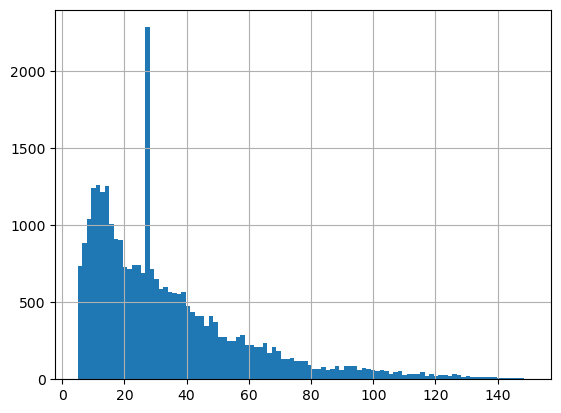

In [92]:
# Hacemos tambien un histograma de la columna promedio_gasto_comida, para ver el tipo de distribucion que tiene
df_restaurants_USA['promedio_gasto_comida'].hist(bins=100)

In [84]:
# De nuevo, se debe filtrar solo los valores logicos: en este caso, valores positivos de gasto, por lo que se va a volver naN los valores negativos y 0 (que no tienen sentido en este contexto)
df_restaurants_USA['promedio_gasto_comida']=df_restaurants_USA['promedio_gasto_comida'].where(df_restaurants_USA['promedio_gasto_comida']>0, np.nan)

In [86]:
# Se revisa de nuevo los datos estadisticos de la columna promedio_gasto_comida:
df_restaurants_USA['promedio_gasto_comida'].describe()

# Obtenemos el coeficiente  de variacion de la columna promedio_gasto_comida
print("Coeficiente de variacion: ",df_restaurants_USA['promedio_gasto_comida'].std()*100/df_restaurants_USA['promedio_gasto_comida'].mean())

Coeficiente de variacion:  75.80579999085506


De nuevo, se va a utilizar la mediana para la imputacion de valores NaN, debido a que el coeficiente de variacion resulta muy alto (Datos muy dispersos) por lo que la media no es una medida representativa.

In [87]:
df_restaurants_USA['promedio_gasto_comida']=df_restaurants_USA['promedio_gasto_comida'].fillna(df_restaurants_USA['promedio_gasto_comida'].median())

#### Tratamiento de preferencias alimenticias

Primero se verificara que no hayan errores en el ingreso de las variables categoricas:

In [97]:
df_restaurants_USA['preferencias_alimenticias'].unique()

array(['Vegetariano', 'Mariscos', 'Carnes', 'Vegano', 'Pescado', 'Otro'],
      dtype=object)

Al comprobar que no tenemos valores irregulares (Algun nombre mal escrito), procedemos con el siguiente paso:

Al ser una variable categorica, lo ideal en este caso es reemplazar los faltantes con la moda de la siguiente manera:

In [91]:
df_restaurants_USA['preferencias_alimenticias']=df_restaurants_USA['preferencias_alimenticias'].fillna(df_restaurants_USA['preferencias_alimenticias'].mode()[0])

### Resultados

De esta manera, se logra tener un dataframe limpio con valores faltantes tratados

In [98]:
df_restaurants_USA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_persona                 30000 non-null  int64  
 1   nombre                     30000 non-null  object 
 2   apellido                   30000 non-null  object 
 3   edad                       30000 non-null  Int64  
 4   genero                     30000 non-null  object 
 5   ciudad_residencia          30000 non-null  object 
 6   estrato_socioeconomico     30000 non-null  object 
 7   frecuencia_visita          30000 non-null  int64  
 8   promedio_gasto_comida      30000 non-null  float64
 9   ocio                       30000 non-null  object 
 10  consume_licor              30000 non-null  object 
 11  preferencias_alimenticias  30000 non-null  object 
 12  membresia_premium          30000 non-null  object 
 13  tipo_de_pago_mas_usado     30000 non-null  obj